In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("duplicate_questions_pairs.csv")
df.shape

(404290, 6)

In [ ]:
df

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
146580,146580,231507,231508,What are the best places to have street food i...,What are the best places in Hyderabad?,0
359660,359660,87268,489339,Is Hillary Clinton a liar?,What are the specific things Hillary Clinton h...,1
358336,358336,95365,487801,"What does ""Active k minutes ago"" mean on Faceb...",What is the difference between active 1 hour a...,0
398043,398043,17213,531238,How does deep residual learning work?,Andrew Ng: What do you think of Microsofts Dee...,0
71287,71287,122700,122701,"Is the statement, ""I'll do what I can"" correct?",Which statement is correct or either of the st...,0
345627,345627,473934,473935,What is Kobe beef?,Is Kobe beef overrated?,0
182557,182557,279370,279371,What are the key components of the Mocoví cult...,What are the key components of Italian culture?,0
342213,342213,90487,405429,How do I prepare myself for my first half mara...,What are some tips for training for a half mar...,1
199274,199274,300723,300724,Is there a way to play Shadow of the colossus ...,How can I get Shadow of the Colossus game for PC?,1
144708,144708,156260,58331,Which is the best search engine?,What is the best email search engine?,0


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

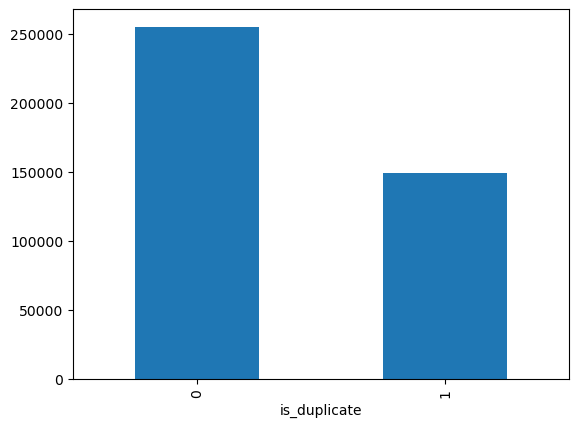

In [8]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


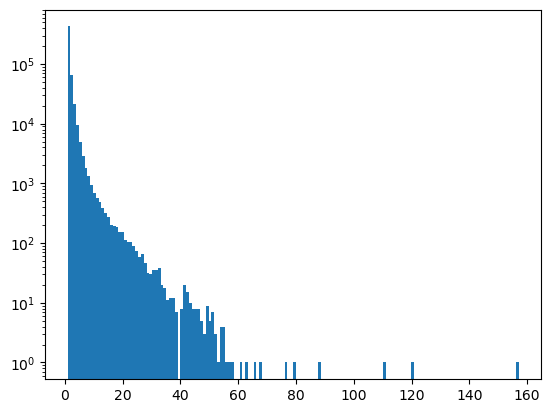

In [10]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# ONLY BOW

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df2 = pd.read_csv("duplicate_questions_pairs.csv") 
df2.shape

(404290, 6)

In [13]:
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [14]:
new_df = df2.sample(30000)

In [15]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [16]:
new_df.duplicated().sum()

0

In [17]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
166691,How is speaking English compared to a language...,"How do you compare the way English is spoken, ..."
1671,What are some interesting differences between ...,Is it weird for a 'hearing' person with no dea...
47620,Who is the only teenager to score a double cen...,I have to create CAD models of tubes having le...
160713,How should India respond to Uri attacks?,How should India respond to the latest Pakista...
317886,How can we define success?,What is the definition of success?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

# Ensure there are no NaN values in the data
ques_df['question1'] = ques_df['question1'].fillna("")
ques_df['question2'] = ques_df['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions).toarray()

# Validate the split index
split_index = len(ques_df['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])


C:\Program Files\KMSpico\temp\ipykernel_11868\12999989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1'] = ques_df['question1'].fillna("")
C:\Program Files\KMSpico\temp\ipykernel_11868\12999989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2'] = ques_df['question2'].fillna("")


In [19]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [20]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
166691,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1671,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
47620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61775,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
94262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [22]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
166691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
317886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7478333333333333

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7328333333333333